In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPRegressor, MLPClassifier

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from pandas.core.computation.check import NUMEXPR_INSTALLED

In [4]:
data = pd.read_csv("forestfires1.csv")
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


In [21]:
def ordinal_code(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

In [22]:
def preprocess_inputs(df, task='regression'):
    df = df.copy()
    
    # ordinal encode month and day columns
    df = ordinal_code(
        df,
        column='month',
        ordering=[
            'jan',
            'feb',
            'mar',
            'apr',
            'may',
            'jun',
            'jul',
            'aug',
            'sep',
            'oct',
            'nov',
            'dec'
        ]
    )
    df = ordinal_code(
        df,
        column='day',
        ordering=[
            'sun',
            'mon',
            'tue',
            'wed',
            'thu',
            'fri',
            'sat'
        ]
    )
    
    # split df into X and y
    if task == 'regression':
        y = df['area']
    elif task == 'classification':
        y = df['area'].apply(lambda x: 1 if x > 0 else 0) # will create a new col that will suggest if it is a large fire or small fire
    
    X = df.drop('area', axis=1) # all other data
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # scaler feature data (X)
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
        
    return X_train, X_test, y_train, y_test

In [24]:
X_train

array([[3, 4, 'sep', ..., 55, 5.4, 0.0],
       [4, 3, 'sep', ..., 63, 4.9, 0.0],
       [1, 4, 'aug', ..., 50, 4.0, 0.0],
       ...,
       [7, 5, 'sep', ..., 40, 4.0, 0.0],
       [1, 4, 'sep', ..., 39, 2.2, 0.0],
       [2, 2, 'aug', ..., 22, 4.5, 0.0]], dtype=object)

In [25]:
y_train

array([4, 3, 4, 2, 6, 4, 4, 5, 4, 6, 4, 4, 5, 4, 5, 4, 6, 4, 5, 6, 5, 4,
       4, 5, 3, 6, 3, 6, 4, 4, 2, 5, 3, 6, 3, 5, 5, 3, 4, 4, 3, 4, 4, 5,
       4, 3, 4, 4, 5, 6, 4, 5, 4, 6, 2, 4, 5, 2, 4, 4, 2, 4, 4, 5, 4, 5,
       5, 2, 4, 4, 2, 4, 4, 3, 4, 9, 4, 3, 5, 5, 5, 2, 5, 3, 4, 6, 4, 5,
       5, 5, 2, 6, 6, 4, 5, 6, 5, 4, 4, 6, 3, 5, 5, 4, 6, 4, 4, 4, 5, 4,
       5, 4, 2, 5, 2, 4, 5, 2, 5, 4, 5, 4, 3, 4, 3, 4, 5, 4, 5, 4, 3, 4,
       4, 4, 4, 4, 5, 4, 4, 5, 6, 4, 5, 4, 5, 4, 6, 6, 5, 3, 6, 5, 5, 9,
       4, 5, 4, 6, 3, 4, 4, 2, 4, 6, 5, 6, 5, 4, 3, 5, 3, 4, 4, 5, 3, 4,
       4, 4, 4, 5, 4, 9, 4, 4, 5, 5, 5, 4, 6, 4, 4, 3, 6, 5, 4, 2, 4, 4,
       5, 2, 5, 4, 5, 3, 4, 4, 6, 5, 2, 4, 4, 5, 4, 5, 5, 6, 4, 2, 4, 5,
       4, 6, 4, 5, 4, 5, 5, 4, 2, 4, 4, 4, 5, 5, 6, 3, 2, 4, 5, 4, 4, 5,
       6, 6, 3, 4, 6, 6, 3, 6, 5, 4, 6, 6, 5, 4, 4, 2, 4, 4, 5, 5, 4, 2,
       5, 3, 4, 2, 4, 2, 4, 3, 5, 3, 6, 4, 3, 2, 5, 2, 6, 5, 4, 6, 4, 2,
       5, 6, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 6, 6, 4,

In [9]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

print("Linear Regression R^2: {:.5f}".format(lin_reg_model.score(X_test, y_test)))
print('Linear Regression R^2: 0.02156')

Linear Regression R^2: 0.02156


In [10]:
nn_reg_model = MLPRegressor(hidden_layer_sizes=(16,16))
nn_reg_model.fit(X_train, y_train)

print("NN Regression R^2: {:.5f}".format(nn_reg_model.score(X_test, y_test)))

NN Regression R^2: 0.04712


In [26]:
X = data.iloc[:, :-1].values 

y = data.iloc[:, 1].values 

In [27]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
regressor = LinearRegression() 


regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)

y_pred = regressor.predict(X_test)



In [11]:
X_train, X_test, y_train, y_test = preprocess_inputs(data, task='classification')

In [12]:
X_train

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0.609497,0.549280,0.653317,-0.970161,0.060985,0.279029,0.572473,-0.406018,0.401972,-0.078036,-0.989687,-0.093528
1,-1.116216,-1.839756,-1.924250,-1.442804,-0.195757,-0.895350,-1.761748,0.137308,-2.243125,0.993349,1.363841,-0.093528
2,-0.253360,0.549280,0.223722,0.447767,-0.179711,2.460689,1.039077,-0.698578,-0.250931,0.678236,-0.473059,-0.093528
3,-0.253360,-0.247066,-1.924250,-0.497519,-0.388314,-1.295139,-1.899971,-1.074727,-0.803388,-0.015014,-0.702671,-0.093528
4,0.178069,-0.247066,0.223722,0.447767,0.686796,1.776676,0.620811,1.035885,0.234561,-0.078036,-0.702671,-0.093528
...,...,...,...,...,...,...,...,...,...,...,...,...
356,-1.116216,0.549280,1.082911,-1.442804,0.333774,-0.970311,0.593645,-0.029870,-0.585754,-0.519195,-1.735927,-0.093528
357,-1.116216,0.549280,0.223722,-0.024876,0.799121,-0.136376,-0.119444,0.889605,0.820500,-0.708263,0.847213,-0.093528
358,0.178069,-0.247066,-1.924250,0.920409,0.189357,-1.176452,-1.860422,0.011925,-0.552272,-1.149422,1.363841,-0.093528
359,1.472353,1.345625,0.223722,-1.442804,0.141217,0.527336,0.232507,0.346279,0.117373,-0.141059,1.076825,-0.093528


In [13]:
y_train

13     0
61     0
453    0
39     0
373    0
      ..
129    0
144    1
72     0
235    1
37     0
Name: area, Length: 361, dtype: int64

In [14]:
lin_clf_model = LogisticRegression()
lin_clf_model.fit(X_train, y_train)

print("Linear Classification Accuracy: {:.2f}%".format(lin_clf_model.score(X_test, y_test) * 100))

Linear Classification Accuracy: 50.64%


In [15]:
nn_clf_model = MLPClassifier(hidden_layer_sizes=(16,16))
nn_clf_model.fit(X_train, y_train)

print("NN Classification Accuracy: {:.2f}%".format(nn_clf_model.score(X_test, y_test) * 100))

NN Classification Accuracy: 55.77%


In [11]:
# Importing the Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, LabelEncoder

In [12]:
# Importing the dataset
df_forest = pd.read_csv("forestfires.csv")
df_forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [13]:
# Shape of the dataset
print ("The shape of the dataset : ", df_forest.shape)

The shape of the dataset :  (517, 13)


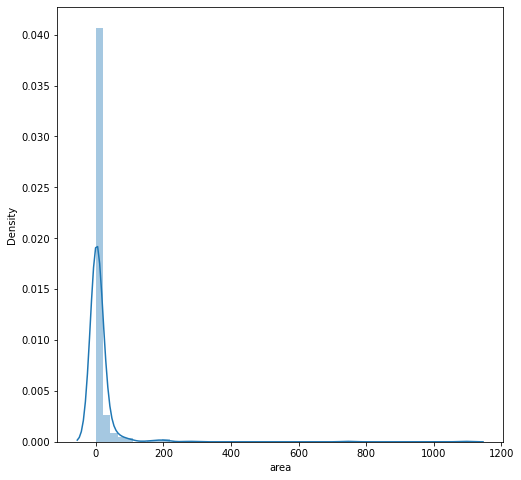

In [14]:
# Skewness of the Area in the dataset
plt.rcParams['figure.figsize'] = [8, 8]
sns.distplot(df_forest['area']);

In [15]:
# Reducing the Right Skewness of the Area using log(n) + 1
df_forest['u_area'] = np.log(df_forest['area'] + 1)

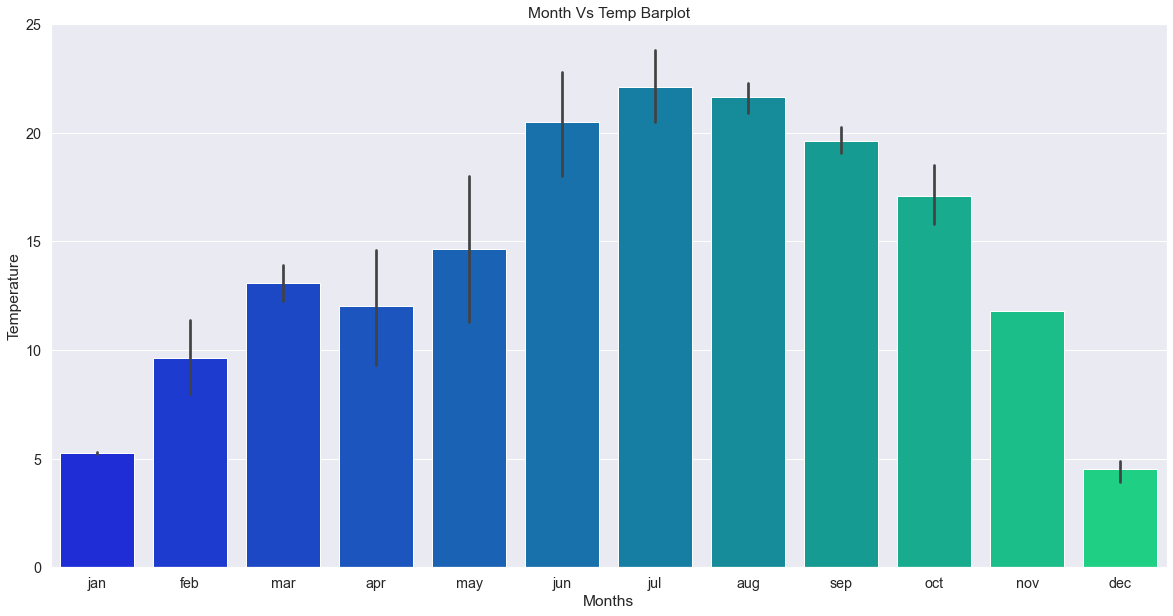

In [16]:
# setting parameters
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = df_forest,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'winter');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature");

In [17]:
df_forest.day.unique()


array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

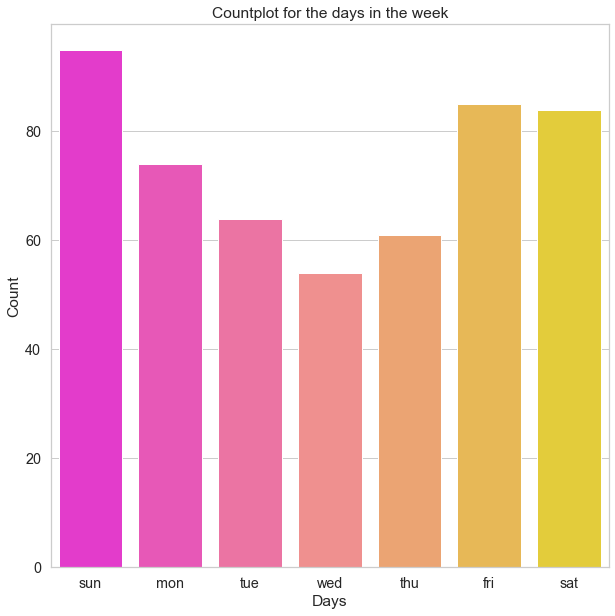

In [18]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.set(style = 'whitegrid', font_scale = 1.3)
day = sns.countplot(df_forest['day'], order = ['sun' ,'mon', 'tue', 'wed', 'thu', 'fri', 'sat'], palette = 'spring')
day.set(title = 'Countplot for the days in the week', xlabel = 'Days', ylabel = 'Count');

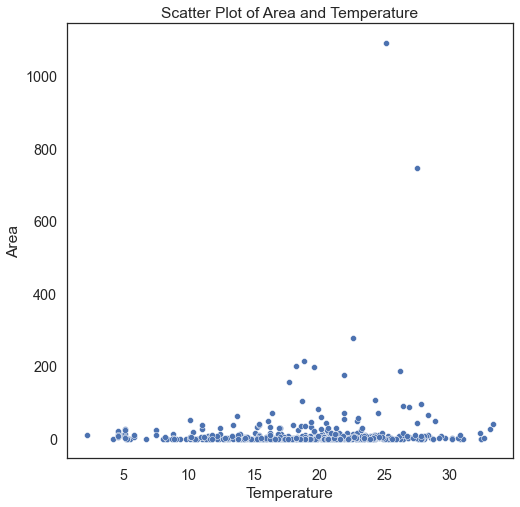

In [19]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.set(style = "white", font_scale = 1.3)
scat = sns.scatterplot(df_forest['temp'], df_forest['area'])
scat.set(title = "Scatter Plot of Area and Temperature", xlabel = "Temperature", ylabel = "Area");

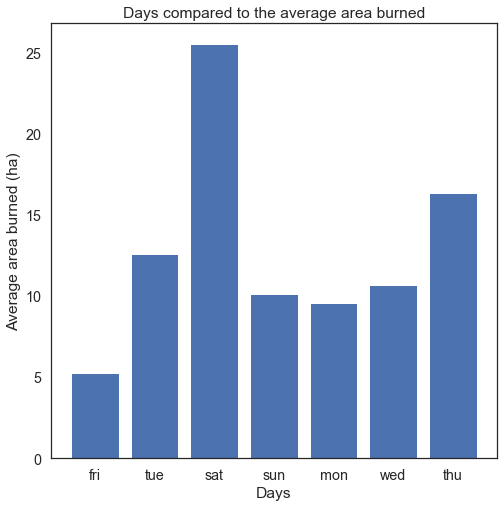

In [28]:
# find the average area burned for each day
days = data['day'].unique()
avg_area_days = []
for day in days:
    avg_area_days.append(data[data['day'] == day]['area'].mean())

plt.bar(days, avg_area_days)
plt.title('Days compared to the average area burned')
plt.xlabel('Days')
plt.ylabel('Average area burned (ha)')
plt.show()

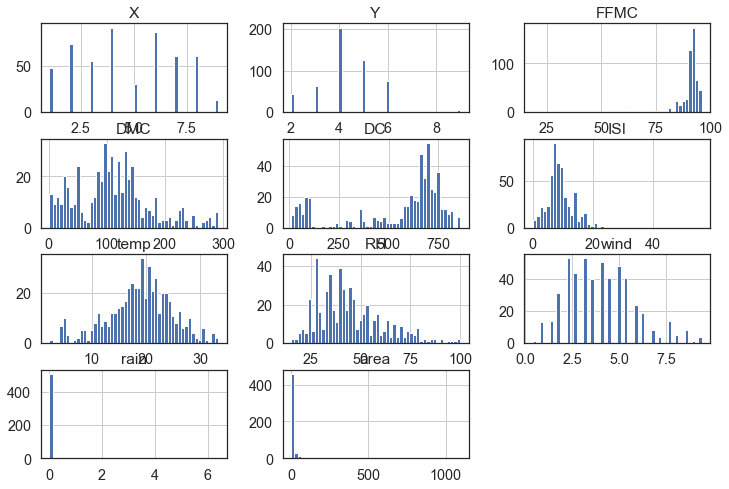

In [29]:

data.hist(bins=50, figsize=(12, 8))
plt.show()

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import random

from sklearn import neural_network, linear_model, preprocessing, svm, tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [2]:
forest_fires = pd.read_csv("forestfires.csv")
forest_fires.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [3]:
forest_fires.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
forest_fires.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [4]:
forest_fires.describe()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [5]:
# If fire area > 0, set the value to 1 and change column name from area to label so that we can see it as a classification problem

forest_fires['area'].values[forest_fires['area'].values > 0] = 1
forest_fires = forest_fires.rename(columns={'area': 'label'})
forest_fires

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,label
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,1.0
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,1.0
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,1.0
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.0


In [6]:
forest_fires.corr()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,label
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.062491
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.056892
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.130329
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,-0.042970
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.073823
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.062672
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.096724
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.035663
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.076047
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.035587


In [7]:
# We can find the third highest correlation coefficients would be "month", "DC", "temp"

In [8]:
forest_fires.corr()['label'].sort_values(ascending=False)

label    1.000000
month    0.130329
DC       0.096724
temp     0.076047
FFMC     0.073823
DMC      0.062672
X        0.062491
Y        0.056892
wind     0.055702
ISI      0.035663
rain     0.025550
RH      -0.035587
day     -0.042970
Name: label, dtype: float64

In [9]:
# Support Vector Machine
from sklearn import metrics
from sklearn.svm import SVC
# fit a SVM model to the data

X = forest_fires.drop('label', axis=1)
y = forest_fires['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101)

svc = SVC()
svc.fit(X_train, y_train)

# make predictions
prediction = svc.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

classes={0:'safe',1:'On Fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]
y_predict=svc.predict(x_new)
print(classes[y_predict[0]])

Accuracy: 0.8153846153846154
Precision: 0.81
Recall: 0.8735632183908046
On Fire


In [10]:
# Decision Tree Classifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

X = forest_fires.drop('label', axis=1)
y = forest_fires['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101)

d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)

# make predictions
predicted = d_tree.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Precision:",metrics.precision_score(y_test, predicted))
print("Recall:",metrics.recall_score(y_test, predicted))


classes={0:'safe',1:'On Fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]
y_predict=d_tree.predict(x_new)
print(classes[y_predict[0]])

Accuracy: 0.7053846153846154
Precision: 0.65
Recall: 0.6735632183908046
On Fire


In [11]:
# Gaussian Naive Bayes
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

X = forest_fires.drop('label', axis=1)
y = forest_fires['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101)

# fit a Naive Bayes model to the data
G_NB = GaussianNB()
G_NB.fit(X_train,y_train)
print(G_NB)
# make predictions
predict = G_NB.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predict))
print("Precision:",metrics.precision_score(y_test, predict))
print("Recall:",metrics.recall_score(y_test, predict))


classes={0:'safe',1:'On Fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]
y_predict=G_NB.predict(x_new)
print(classes[y_predict[0]])

GaussianNB()
Accuracy: 0.7853846153846154
Precision: 0.68
Recall: 0.4335632183908046
On Fire


In [12]:
# Logistic Regression Classification

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(forest_fires.drop('label',axis=1))
scaled_features = scaler.transform(forest_fires.drop('label',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=forest_fires.columns[:-1])
df_feat.head()

X = df_feat
y = forest_fires['label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

from sklearn import metrics
logmodel.score(X_train,y_train)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))


Accuracy: 0.7873846153846154
Precision: 0.64
Recall: 0.6535632183908046


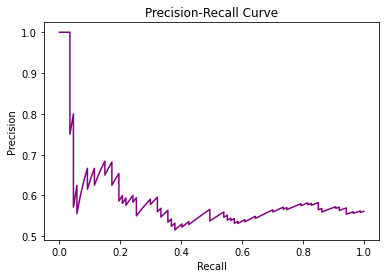

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

#fit logistic regression model to dataset
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)[:, 1]

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [35]:
import pandas as pd
df = pd.read_csv('forestfires.csv')

In [36]:
X = df[['DMC']]
y = df['area']

In [37]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [38]:
from sklearn.metrics import mean_squared_error
y_pred = lin_reg.predict(X)
mse = mean_squared_error(y, y_pred)
print(mse)

4022.6772679332657
